#### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.io import loadmat

## 1 Multi-class Classification

#### 1.1 Dataset

In [2]:
input_layer_size = 400
num_labels = 10

data = loadmat('ex3data1.mat')
x, y = data['X'], data['y']
x = np.insert(x, 0, 1, axis=1)
y[y == 10] = 0

print('x:', x.shape)
print('y:', y.shape, 'unique y:', np.unique(y))


x: (5000, 401)
y: (5000, 1) unique y: [0 1 2 3 4 5 6 7 8 9]


#### 1.2 Visualizing the data

(-0.5, 199.5, 19.5, -0.5)

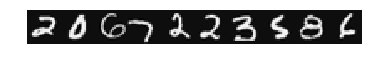

In [3]:
sample = np.random.choice(x.shape[0], 10)
plt.imshow(x[sample,1:].reshape(-1,20).T, cmap = 'gray')
plt.axis('off')

#### 1.3 Vectorizing logisitic regression

Creating sigmoid function

In [4]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

Creating unregularized cost function

In [6]:
def cost(theta, x, y, reg):
    h = sigmoid(np.dot(x, theta))
    m = y.size
    
    cost = -1*(1/m)*(np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y)) + (reg/(2*m)*np.sum(np.square(theta[1:])))
    
    return cost

Creating unregularized gradient descent function

In [7]:
def gradient(theta, x, y, reg):
    h = sigmoid(np.dot(x, theta))
    m = y.size
    
    gradient = (1/m)*np.dot(x.T, h-y) 
    reg_term = (reg/m)*theta[1:]
    gradient = gradient[1:] + reg_term
    
    return gradient

In [7]:
pop = np.array([[1,2,3,4,5],[6,7,8,9,0]])
stop = np.array([1,2,3,4,5])
print('pop dim:', pop.shape)
print('stop dim:', stop.shape)


pop dim: (2, 5)
stop dim: (5,)


In [8]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [9]:
print(X_t)

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [10]:
j = cost(theta_t, X_t, y_t, lambda_t)
poll = gradient(theta_t, X_t, y_t, lambda_t)
print(poll)

[-0.54855841  0.72472227  1.39800296]


#### 1.4 One-vs-all classification

In [11]:
def one_all(x, y, num_labels, reg):
    m, n = x.shape
    initial_theta = np.zeros(n+1)
    
    res = optimize.minimize(cost,
                            (x, y==c, reg),
                            jac=True,
                            method='TNC',
                            options={'maxiter': 100}) #[1x401]
    
    return all_theta #[10x401]